In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The goal of this work is to train a simple model for predicting the duration of a ride -
NYC taxi dataset "Yellow Taxi Trip Records" is used.
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
Training Data: January 2022
Validation Data: February 2022.

one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries
Fit a dictionary vectorizer
Get a feature matrix from it

In [2]:
# load train & validation dataset
df_train = pd.read_parquet('week1-data/yellow_tripdata_2022-01.parquet', engine='fastparquet')
df_val = pd.read_parquet('week1-data/yellow_tripdata_2022-02.parquet', engine='fastparquet')

In [3]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [4]:
df_train.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689726208,2022-01-17 01:34:04.421900544,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


In [5]:
#change the data type from int to string for one-hot encoding
df_train["PULocationID"] = df_train["PULocationID"].astype(str)
df_train["DOLocationID"] = df_train["DOLocationID"].astype(str)
df_val["PULocationID"] = df_val["PULocationID"].astype(str)
df_val["DOLocationID"] = df_val["DOLocationID"].astype(str)

In [6]:
# number of columns in training dataset
len(df_train.columns)

19

In [7]:
#list of columns
df_train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
# check for the timestamp
df_train["tpep_pickup_datetime"]

0         2022-01-01 00:35:40
1         2022-01-01 00:33:43
2         2022-01-01 00:53:21
3         2022-01-01 00:25:21
4         2022-01-01 00:36:48
                  ...        
2463926   2022-01-31 23:36:53
2463927   2022-01-31 23:44:22
2463928   2022-01-31 23:39:00
2463929   2022-01-31 23:36:42
2463930   2022-01-31 23:46:00
Name: tpep_pickup_datetime, Length: 2463931, dtype: datetime64[ns]

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [10]:
# list out the featues having null elements
df_train.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [11]:
#get all columns of a dataframe
def get_columns(df):
    return df.columns

# list the rows having nan feature(s)
def get_nan_count(df):
    return df.isna().sum()

# calculate trip duration in minutes 
def time_diff_to_mins(df, pickup, drop_off):
    '''
       calculate trip duration in minutes
        df: input dataframe
        pickup: column name of the pick-up time
        drop_off: column name of the drop-off time
        
        returns the processed dataframe
    '''
    df['duration'] = df[drop_off] - df[pickup]
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    return df

In [12]:
get_columns(df_train)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [13]:
get_columns(df_val)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [14]:
# list of features having null data in training set
get_nan_count(df_train)

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

In [15]:
# list of features having null data in validation set set
get_nan_count(df_val)

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          101738
trip_distance                 0
RatecodeID               101738
store_and_fwd_flag       101738
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     101738
airport_fee              101738
dtype: int64

In [16]:
# columns having no values can be dropped, other columns are
# dropped off as we will be using only the features: location_id, trip_distance & target: duration
cols_to_be_dropped = ["passenger_count", "RatecodeID", "store_and_fwd_flag", "congestion_surcharge", "airport_fee", "payment_type",
                     "fare_amount", "extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount", "VendorID" ]

In [17]:
# drop features having no values or not needed
df_train = df_train.drop(cols_to_be_dropped, axis=1)
df_val = df_val.drop(cols_to_be_dropped, axis=1)

In [18]:
# check for the nan in needed features
get_nan_count(df_train)

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
PULocationID             0
DOLocationID             0
dtype: int64

In [19]:
# create a cross- feature named duration by converting pick-up & drop-off timestamps
pickup_colm = "tpep_pickup_datetime"
dropoff_colm = "tpep_dropoff_datetime"
df_train = time_diff_to_mins(df_train, pickup_colm, dropoff_colm)
df_text = time_diff_to_mins(df_val, pickup_colm, dropoff_colm)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   PULocationID           object        
 4   DOLocationID           object        
 5   duration               float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 112.8+ MB


In [21]:
df_train.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,duration
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,236,17.816667
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,42,8.400000
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,166,8.966667
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,68,10.033333
4,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,163,37.533333


<AxesSubplot:>

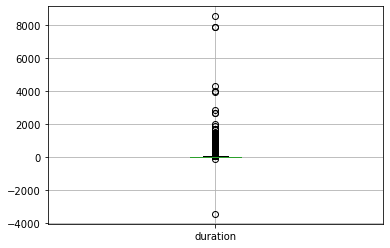

In [22]:

# Next, we need to check the distribution of the duration variable. 
# There are some outliers. Let's remove them and keep only the records where the duration
# was between 1 and 60 minutes (inclusive).

df_train.boxplot(column=["duration"])

In [23]:
df_train.duration.describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

In [24]:
def drop_by_duration(df, min_min=1, max_min=60):
    df = df[(df.duration >= 1) & (df.duration <= 60 )]
    return df

In [25]:
# dropping outliers on both train & validation set
df_train = drop_by_duration(df_train, min_min=1, max_min=60)
df_val = drop_by_duration(df_val, min_min=1, max_min=60)

In [26]:
# 2463931 - number of rows before dropping outliers
# 2421440 - number of row after dropping outliers
# Nearly, 98.2% of data is retained after dropping outliers

In [27]:
df_train["PULocationID"]

0          142
1          236
2          166
3          114
4           68
          ... 
2463926     90
2463927    107
2463928    113
2463929    148
2463930    186
Name: PULocationID, Length: 2421440, dtype: object

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   trip_distance          float64       
 3   PULocationID           object        
 4   DOLocationID           object        
 5   duration               float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 129.3+ MB


In [29]:
df_train.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,duration
count,2421440,2421440,2.421440e+06,2.421440e+06
mean,2022-01-17 01:35:16.982017792,2022-01-17 01:47:57.258748160,5.374377e+00,1.267128e+01
min,2008-12-31 23:03:01,2008-12-31 23:06:56,0.000000e+00,1.000000e+00
25%,2022-01-09 15:35:25,2022-01-09 15:47:44,1.060000e+00,6.433333e+00
50%,2022-01-17 11:58:39.500000,2022-01-17 12:09:32.500000,1.760000e+00,1.023333e+01
75%,2022-01-24 13:30:43.500000,2022-01-24 13:43:12.500000,3.120000e+00,1.613333e+01
max,2022-05-18 20:41:57,2022-05-18 20:47:45,3.061593e+05,6.000000e+01
std,NaN,NaN,5.524458e+02,8.999282e+00


In [30]:
# dropping columns that have been cross-featured
columns_duration = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_train = df_train.drop(columns_duration, axis=1)
df_val = df_val.drop(columns_duration, axis=1)

In [31]:
df_train.describe()

,trip_distance,duration
count,2.421440e+06,2.421440e+06
mean,5.374377e+00,1.267128e+01
std,5.524458e+02,8.999282e+00
min,0.000000e+00,1.000000e+00
25%,1.060000e+00,6.433333e+00
50%,1.760000e+00,1.023333e+01
75%,3.120000e+00,1.613333e+01
max,3.061593e+05,6.000000e+01


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trip_distance  float64
 1   PULocationID   object 
 2   DOLocationID   object 
 3   duration       float64
dtypes: float64(2), object(2)
memory usage: 92.4+ MB


In [33]:
# Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

# Turn the dataframe into a list of dictionaries
# Fit a dictionary vectorizer
# Get a feature matrix from it
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trip_distance  float64
 1   PULocationID   object 
 2   DOLocationID   object 
 3   duration       float64
 4   PU_DO          object 
dtypes: float64(2), object(3)
memory usage: 110.8+ MB


In [35]:
# drop the features which are cross-featured
df_train = df_train.drop(['PULocationID', 'DOLocationID'], axis=1)
df_val = df_val.drop(['PULocationID', 'DOLocationID'], axis=1)

# only these two features are neededd for the model
categorical = ['PU_DO'] 
numerical = ['trip_distance']


dv = DictVectorizer()
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
# Get a feature matrix from it
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
# Get a feature matrix from it
X_test = dv.transform(val_dicts)

In [36]:
X_train

<2421440x20667 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trip_distance  float64
 1   duration       float64
 2   PU_DO          object 
dtypes: float64(2), object(1)
memory usage: 73.9+ MB


In [38]:
#number of columns shows the dimensionality fo the matrix
X_train

<2421440x20667 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

### Linera Regression

In [39]:
target = 'duration'
y_train = df_train[target].values
y_test = df_val[target].values
lr = LinearRegression()
lr.fit(X_train, y_train)
x_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

print(f'mse - validation data : {mean_squared_error(y_test, y_pred, squared=False)}')

mse - validation data : 5.414824520221955


In [40]:
print(f' mse - train data :{mean_squared_error(y_train, x_pred, squared=False)}')

 mse - train data :4.565164624102023


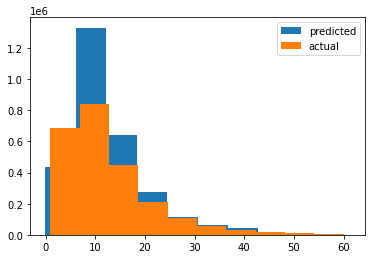

In [41]:
plt.hist(y_pred, label="predicted")
plt.hist(y_train, label="actual")
plt.legend()

### Lasso Regression

In [42]:
lr = Lasso(alpha=0.01)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#
print(f' mse - train data :{mean_squared_error(y_test, y_pred, squared=False)}')

 mse - train data :9.374921127169834


### Ridge Regression

In [43]:
lr = Ridge(alpha=0.01)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(f' mse - train data :{mean_squared_error(y_test, y_pred, squared=False)}')

 mse - train data :6.007382247607882
